
✅ Columns in dataset: ['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights', 'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity', 'vehicle_count', 'time_of_day']

✅ Model Accuracy: 0.1992


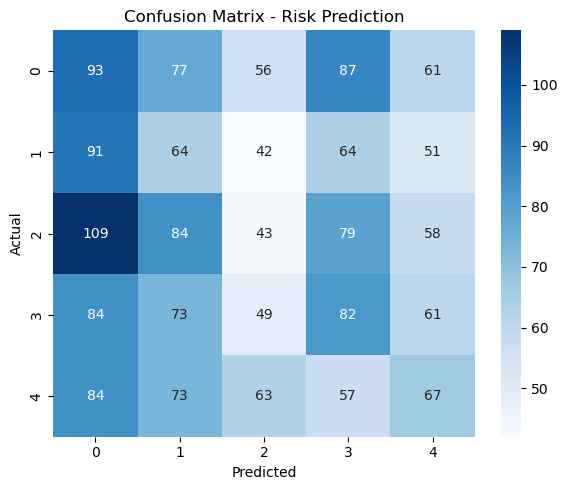

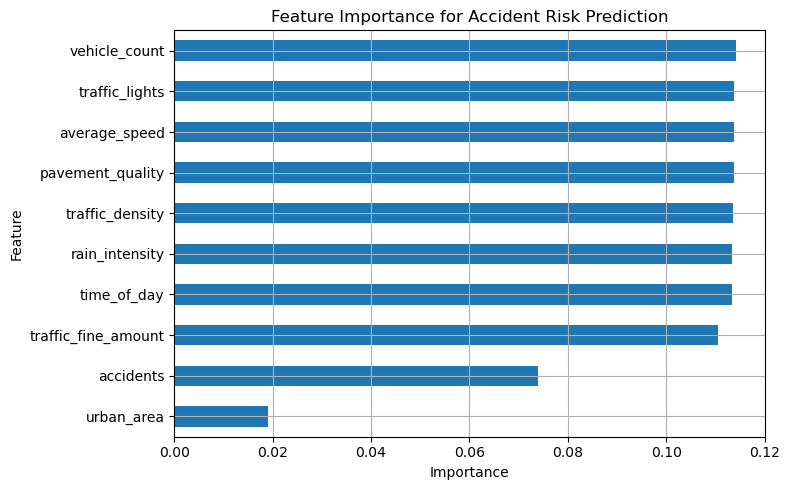

C:\Users\Pawan ka\AppData\Local\Temp\ipykernel_12592\163334721.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Score', data=data, palette='Set2')


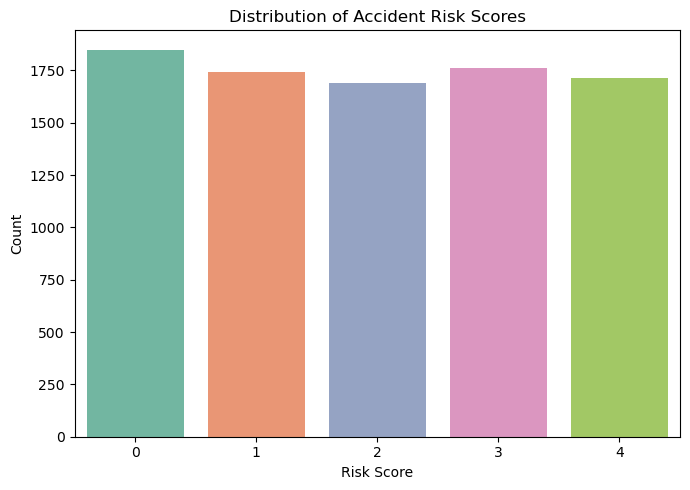


📂 All graphs saved in folder: 'saved_graphs' ✅


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a folder to save graphs
save_dir = "saved_graphs"
os.makedirs(save_dir, exist_ok=True)

# Load your dataset
data = pd.read_csv('traffic_accidents.csv')  # Make sure your file is ready

# View available columns
print("\n✅ Columns in dataset:", data.columns.tolist())

# Assume we predict an accident risk factor based on features
# (Without 'Severity')

# --- Step 1: Handle Categorical Columns ---
possible_categorical_cols = ['Weather', 'Time_of_Day', 'Road_Type', 'Light_Conditions']

# Only keep available ones
categorical_cols = [col for col in possible_categorical_cols if col in data.columns]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# --- Step 2: Feature Engineering ---
# Let's create a simple "Accident Risk Score" (a fake target for AI prediction) 
# based on available data

# Example: create a 'Risk_Score' based on existing features
data['Risk_Score'] = (data.select_dtypes(include=[np.number]).sum(axis=1) % 5).astype(int)

# Now we'll predict Risk_Score based on other features

X = data.drop('Risk_Score', axis=1)
y = data['Risk_Score']

# --- Step 3: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Model Training ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Step 5: Prediction ---
y_pred = model.predict(X_test)

# --- Step 6: Evaluation ---
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc:.4f}")

# --- Step 7: Graph 1: Confusion Matrix ---
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Risk Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'confusion_matrix_risk.png'))
plt.show()

# --- Step 8: Graph 2: Feature Importance ---
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance for Accident Risk Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'feature_importance_risk.png'))
plt.show()

# --- Step 9: Graph 3: Risk Score Distribution ---
plt.figure(figsize=(7,5))
sns.countplot(x='Risk_Score', data=data, palette='Set2')
plt.title('Distribution of Accident Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'risk_score_distribution.png'))
plt.show()

print(f"\n📂 All graphs saved in folder: '{save_dir}' ✅")
